# Continut
## [1. Importul datelor si explorarea acestora](#import)
## [2. Crearea seturilor](#set)
## [3. Crearea modelului GradientBoostingClassifier implicit](#model)
## [4. Determinarea caracterisiticii celei mai importante](#important)
## [5. Determinarea parametrilor optimi ai GradientBoostingClassifier](#stump)
## [6. Determinarea importantei caracteristicilor pentru modelul optim](#optim)

<a id='import'></a>
# 1. Importul datelor si explorarea acestora

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importul datelor
df = pd.read_csv("mushrooms.csv")

Sursa datelor: https://archive.ics.uci.edu/ml/datasets/Mushroom

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# vizualizarea informației despre date df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# verificarea prezentei lipsurilor df.isna().sum()
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# vizualizarea informatiei statistice despre date df.describe().transpose()
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


<AxesSubplot:xlabel='class', ylabel='count'>

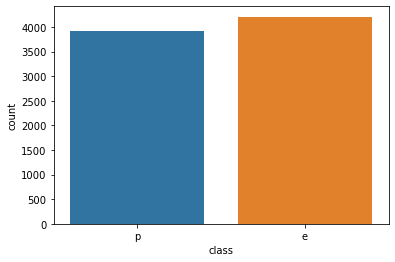

In [7]:
# determinarea numărului de valori pentru clasele label sns.countplot(data=df,x=col_label)
sns.countplot(data=df,x='class')

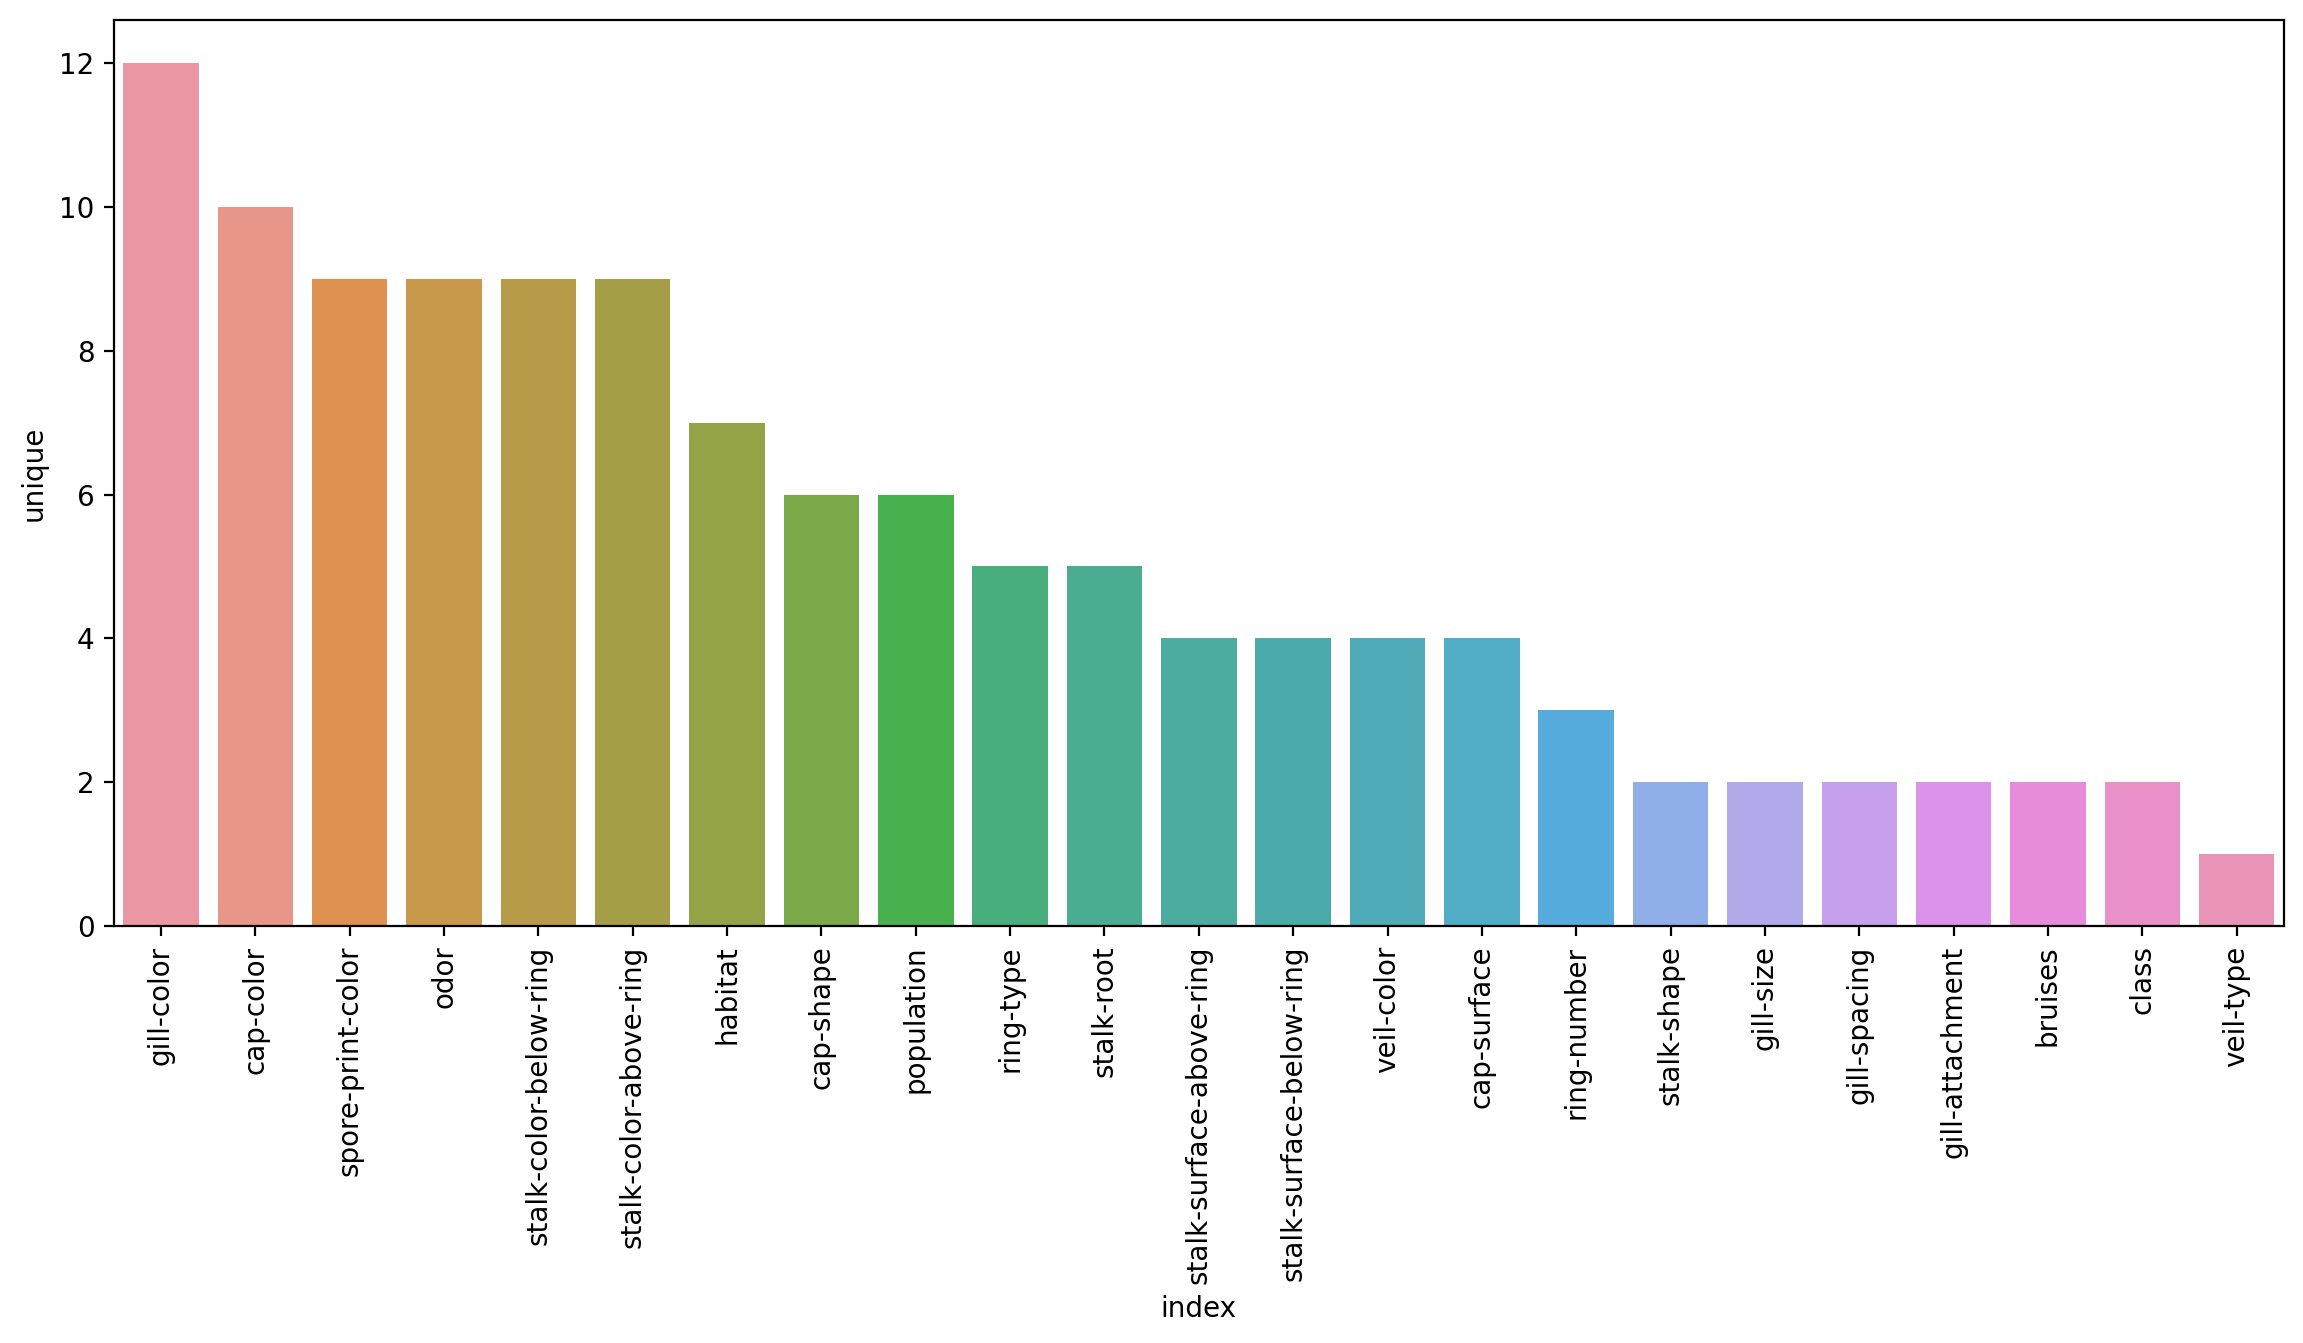

In [8]:
# afișarea grafica a numărului de valori unice pe categorie 
# sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique', ascending=False),x='index',y='unique')
plt.xticks(rotation=90);

<a id='set'></a>
# 2. Crearea seturilor

In [9]:
# crearea setului X  X=df.drop(col_label, axis=1)
X = df.drop('class',axis=1)

In [10]:
# transformarea datelor categoriale in numerice in setul X X = pd.get_dummies(X,drop_first=True)
X = pd.get_dummies(X,drop_first=True)

In [11]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [12]:
# crearea setului y y=df[col_label]
y = df['class']

In [13]:
#crearea seturilor de train si de test 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

<a id='model'></a>
# 3. Crearea modelului GradientBoostingClassifier implicit

In [14]:
# importul algoritmului GradientBoostingClassifier from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
# crearea modelului GradientBoostingClassifier implicit model = GradientBoostingClassifier()
model = GradientBoostingClassifier()

In [16]:
# ajustarea modelului pe datele de training model.fit(X_train, y_train)
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [17]:
# realizarea predicției model.predict(X_test)
y_pred=model.predict(X_test)

In [18]:
# importul functiilor de evaluare
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [19]:
# determinarea acurateti modelului accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9991796554552912

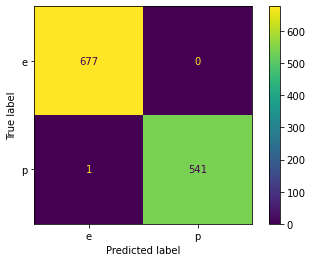

In [20]:
# vizualizarea grafica a confusion matrix a modelului plot_confusion_matrix(model,X_test,y_test)
plot_confusion_matrix(model,X_test,y_test)

In [21]:
# elaborarea classificasion report a modelului print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       677
           p       1.00      1.00      1.00       542

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



<a id='important'></a>
# 4. Determinarea caracteristicii celei mai importante

In [22]:
#determinarea importantei fiecărei caracteristici confrom modelului cu un stump model.feature_importances_
model.feature_importances_

array([ 2.11786779e-04,  1.51922239e-17,  0.00000000e+00,  0.00000000e+00,
        1.36299180e-16,  1.18286104e-03,  6.39926963e-17,  1.86227681e-05,
        1.46454046e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.49901324e-16,  2.97306490e-18,  0.00000000e+00,  4.69270030e-08,
        2.00502460e-03,  5.57607815e-02,  5.46385791e-04,  2.12464679e-02,
        2.09604240e-02,  1.40911686e-04,  6.09828829e-01,  4.16265562e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.15669345e-02,
        1.17310790e-02,  0.00000000e+00,  4.07202693e-17,  0.00000000e+00,
        7.07948987e-18,  0.00000000e+00,  0.00000000e+00,  7.98016934e-21,
        2.85769160e-17, -7.04132589e-23,  3.91069079e-17,  0.00000000e+00,
        0.00000000e+00,  3.43911061e-06,  1.32213038e-01,  5.74027821e-03,
        2.26553080e-02,  4.38567284e-04,  5.56387529e-03,  5.46797267e-06,
        0.00000000e+00,  8.05785949e-04,  5.02789732e-02,  1.39516494e-05,
        0.00000000e+00,  

In [23]:
#determinarea  indexului caracteristicii celei mai importante model.feature_importances_.argmax()
index = model.feature_importances_.argmax()

In [24]:
# determinarea denumirii caracteristicii celei mai importante X.columns[model.feature_importances_.argmax()]
X.columns[index]

'odor_n'

Conform datelor transformate in valori numierice din valori categoriale cea mmai importanta caracteristica este 'odor_n' care corespunde valorii n din caracteristica 'odor' a setului de date initiale

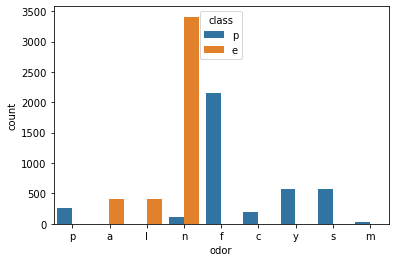

In [25]:
# vizualizarea numărului de valori ale clasei label in funcție de caracteristică cea mai importanta indatele initiale
# sns.countplot(data=df,x=col_importanta,hue=col_label)
sns.countplot(data=df,x='odor',hue='class');

Din acest grafic se observa ca daca mirosul ciupercii este a - de migdale, l - de anason sau n - lipseste cel mai probabil ca cipercile sunt comenstibile, in caz contrar acestea sunt otravitoare

In [27]:
# formarea unui df cu datele depre importanta cararcteristicilor 
caract_import = model.feature_importances_
imp_caract = pd.DataFrame(index=X.columns,data=caract_import,columns=['Importanta'])

In [29]:
# sortarea caracteristicilor dupa imporanta
imp_caract = imp_caract.sort_values("Importanta",ascending=False)

In [30]:
imp_caract

,Importanta
odor_n,6.098288e-01
stalk-root_c,1.322130e-01
bruises_t,5.576078e-02
stalk-surface-below-ring_y,5.027897e-02
spore-print-color_r,3.043440e-02
...,...
gill-color_e,0.000000e+00
stalk-shape_t,0.000000e+00
gill-attachment_f,0.000000e+00
habitat_w,0.000000e+00


In [32]:
# excluderea carcteristicilor cu importanta foarte mica
imp_caract = imp_caract[imp_caract['Importanta'] > 0.001]

In [33]:
imp_caract

,Importanta
odor_n,0.609829
stalk-root_c,0.132213
bruises_t,0.055761
stalk-surface-below-ring_y,0.050279
spore-print-color_r,0.030434
stalk-root_r,0.022655
odor_f,0.021246
odor_l,0.020960
gill-size_n,0.011731
gill-spacing_w,0.011567


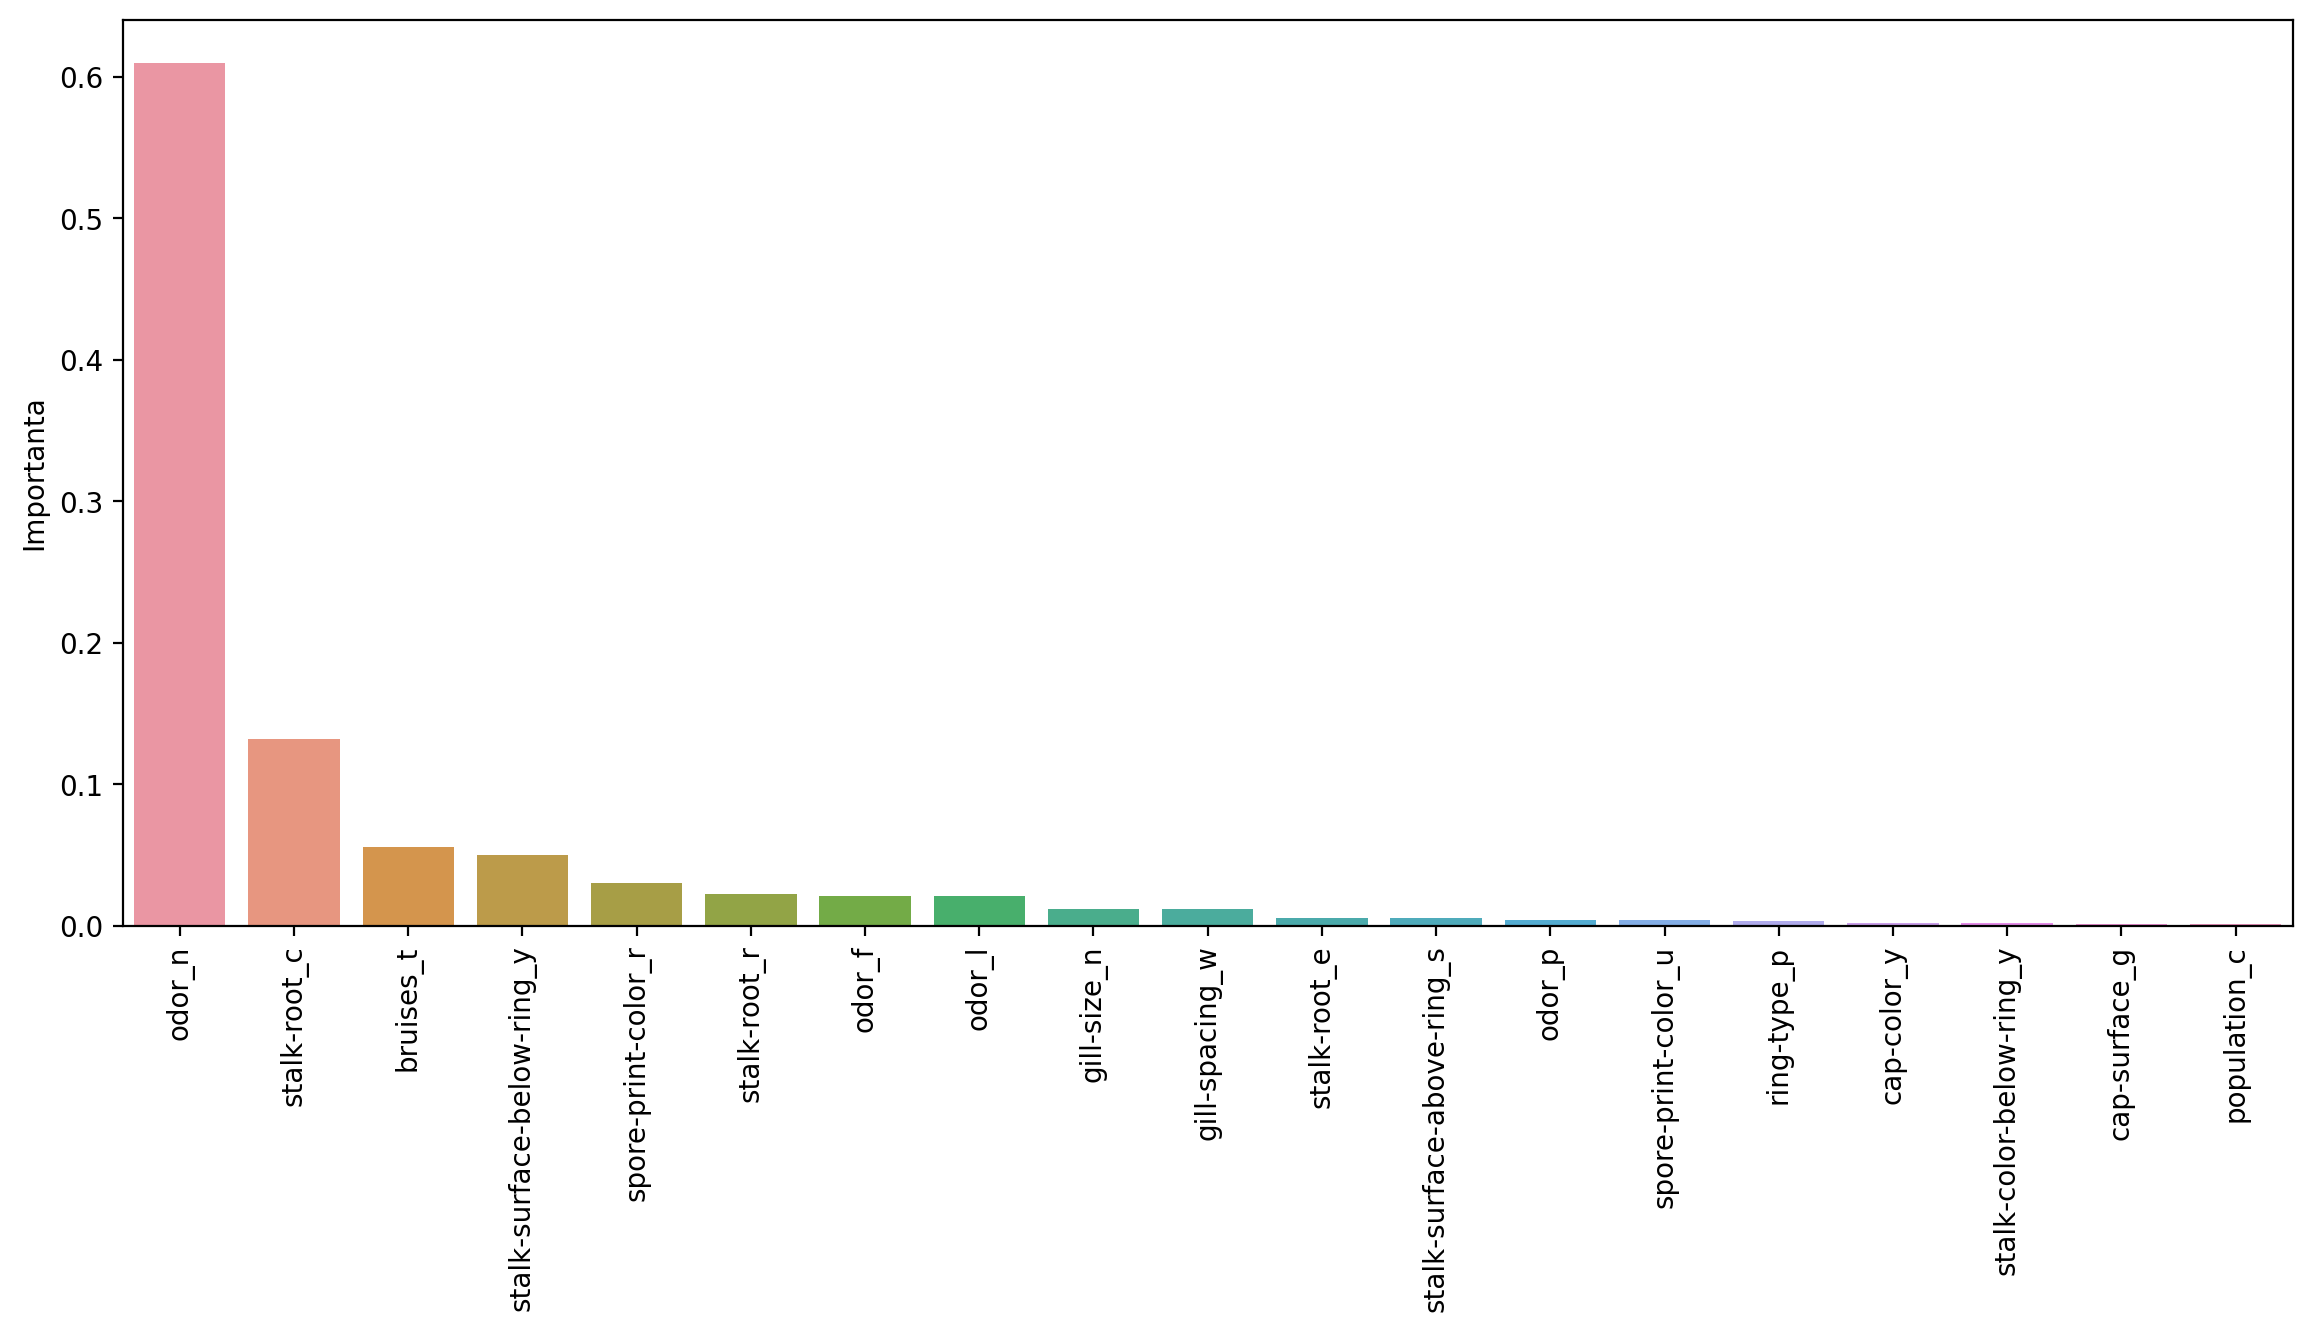

In [34]:
# vizualizarrea grafica a importantei caracteristicilor
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_caract,x=imp_caract.index, y='Importanta')
plt.xticks(rotation=90);

<a id='stump'></a>
# 5. Determinarea parametrilor optimi ai GradientBoostingClassifier 

In [35]:
# crearea modelului GradientBoostingClassifier de baza model = GradientBoostingClassifier()
model = GradientBoostingClassifier()

In [36]:
# importul modulului GhidSearchCV from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [37]:
# crearea dictionarului cu hiper-parametri pentru GhidSearchCV param_grid
param_grid = {"n_estimators":[1,5,10,20,40,100],
              'max_depth':[3,4,5,6]}

In [38]:
# crearea modelului GhidSearchCV pe baza modelului GradientBoostingClassifier model_grid = GridSearchCV(model,param_grid)
model_grid = GridSearchCV(model,param_grid)

In [39]:
# ajustarea modelului pe datele de training model_grid.fit(X_train, y_train)
model_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [40]:
# realizarea predicției model_grid.predict(X_test)
y_pred = model_grid.predict(X_test)

In [41]:
# determinarea acurateti modelului accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

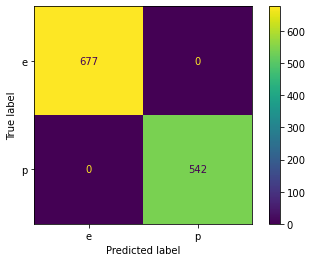

In [43]:
# vizualizarea grafica a confusion matrix a modelului plot_confusion_matrix(model,X_test,y_test)
plot_confusion_matrix(model_grid,X_test,y_test)

In [44]:
# elaborarea classificasion report a modelului print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       677
           p       1.00      1.00      1.00       542

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [45]:
# vizualizarea celor mai buni hiperparametri model_grid.best_params_
model_grid.best_params_

{'max_depth': 4, 'n_estimators': 100}

<a id='optim'></a>
# 6. Determinarea importantei caracteristicilor pentru modelul optim

In [46]:
# determinarea importantei fiecărei caracteristici model_grid.best_estimator_.feature_importances_
model_grid.best_estimator_.feature_importances_

array([6.37632463e-04, 1.74254866e-19, 0.00000000e+00, 0.00000000e+00,
       6.77828542e-17, 1.78676611e-03, 2.67748576e-16, 5.79215771e-05,
       0.00000000e+00, 0.00000000e+00, 4.20374998e-18, 5.99439501e-20,
       1.07698405e-18, 0.00000000e+00, 0.00000000e+00, 2.50909730e-16,
       0.00000000e+00, 8.06335383e-02, 0.00000000e+00, 1.30820156e-02,
       3.55639411e-03, 2.43672499e-09, 6.18061179e-01, 3.14721181e-02,
       0.00000000e+00, 0.00000000e+00, 1.73324416e-08, 3.25503978e-03,
       1.71219527e-03, 0.00000000e+00, 7.60873243e-18, 1.71635290e-17,
       0.00000000e+00, 2.21305571e-18, 0.00000000e+00, 9.18961542e-17,
       5.83226552e-16, 0.00000000e+00, 4.42091529e-18, 0.00000000e+00,
       0.00000000e+00, 1.41244684e-04, 1.00854581e-01, 1.48808692e-02,
       8.91061415e-03, 0.00000000e+00, 2.67252632e-16, 0.00000000e+00,
       0.00000000e+00, 4.54781080e-19, 5.56962233e-02, 3.61861904e-08,
       0.00000000e+00, 0.00000000e+00, 8.39885021e-04, 1.08529258e-08,
      

In [47]:
# structurarea importantei caracteristicilor intr-u df
caracteristici = pd.DataFrame(index=X.columns,data=model_grid.best_estimator_.feature_importances_,columns=['Importanta'])

In [49]:
# sortarea caracteristicilor dupa importanta
caracteristici=caracteristici.sort_values("Importanta",ascending=False)

In [50]:
caracteristici

,Importanta
odor_n,0.618061
stalk-root_c,0.100855
bruises_t,0.080634
stalk-surface-below-ring_y,0.055696
odor_p,0.031472
...,...
stalk-color-above-ring_y,0.000000
stalk-color-below-ring_e,0.000000
stalk-color-below-ring_g,0.000000
stalk-color-below-ring_p,0.000000


In [51]:
# selectarea doar a celor caracteristici cu importanta mai mare de 0.001
caracter_import = caracteristici[caracteristici['Importanta']>0.001]

In [52]:
caracter_import

,Importanta
odor_n,0.618061
stalk-root_c,0.100855
bruises_t,0.080634
stalk-surface-below-ring_y,0.055696
odor_p,0.031472
spore-print-color_r,0.029920
spore-print-color_h,0.016379
stalk-root_e,0.014881
odor_f,0.013082
stalk-root_r,0.008911


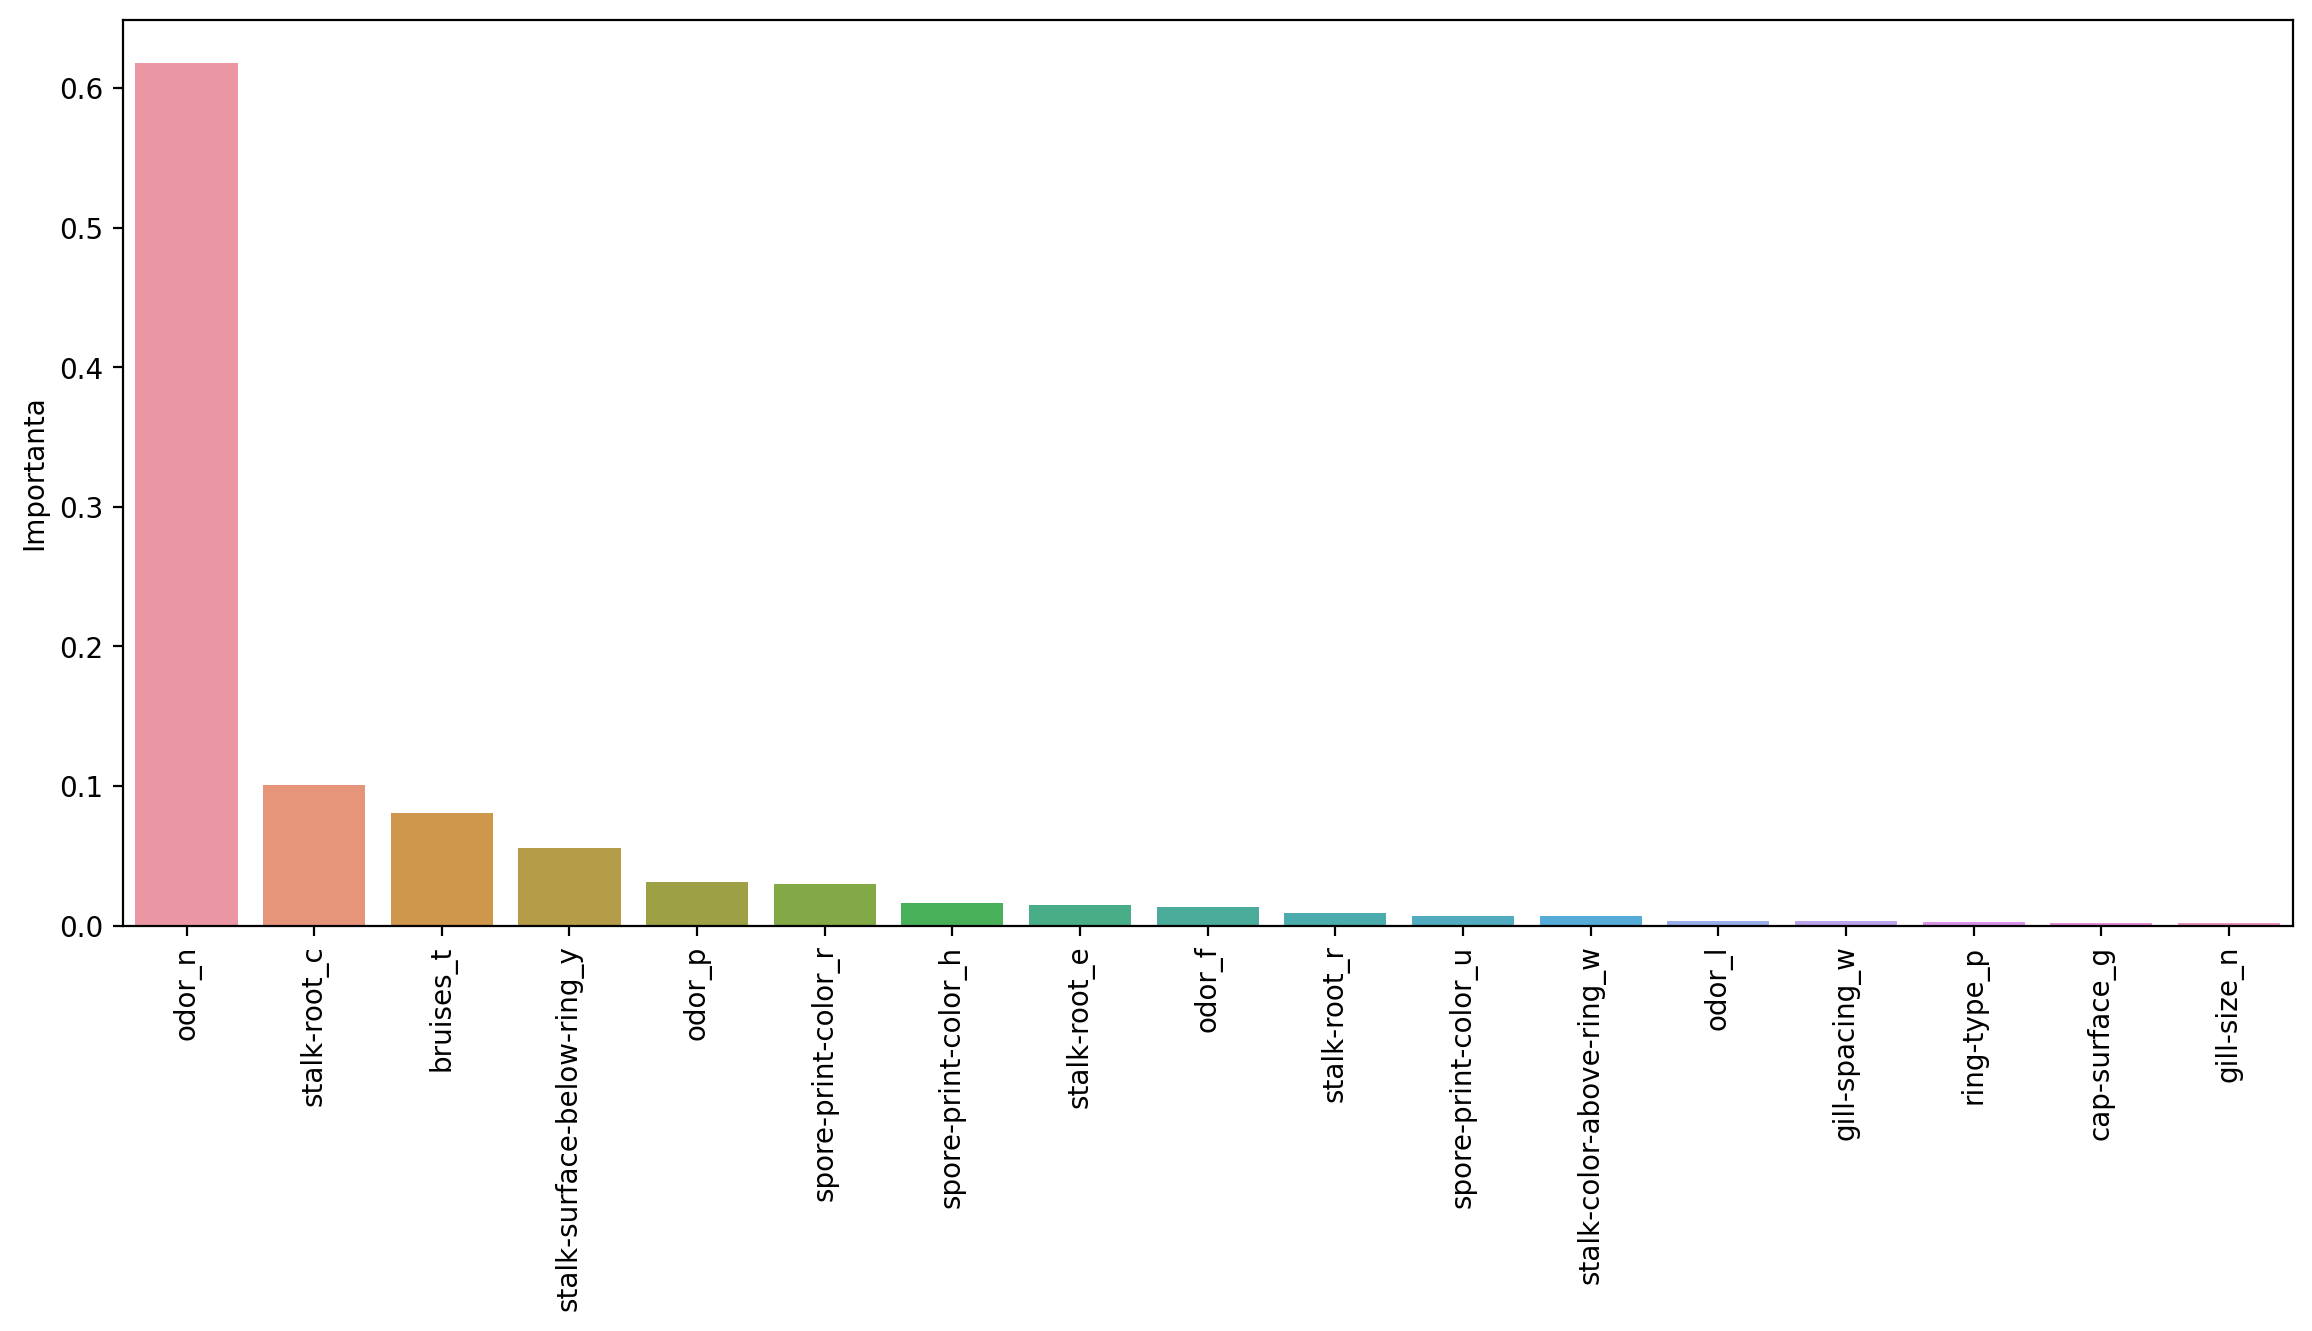

In [53]:
# vizualizarrea grafica a importantei caracteristicilor
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=caracter_import,x=caracter_import.index, y='Importanta')
plt.xticks(rotation=90);